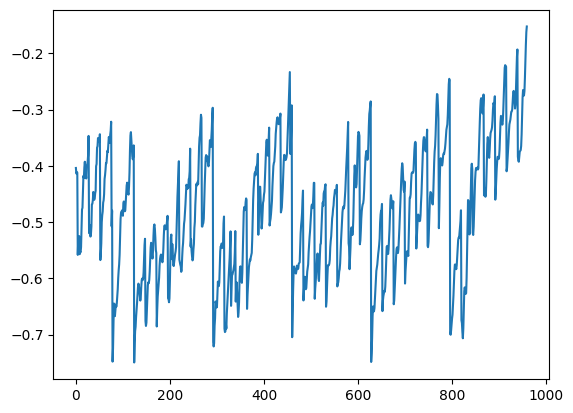

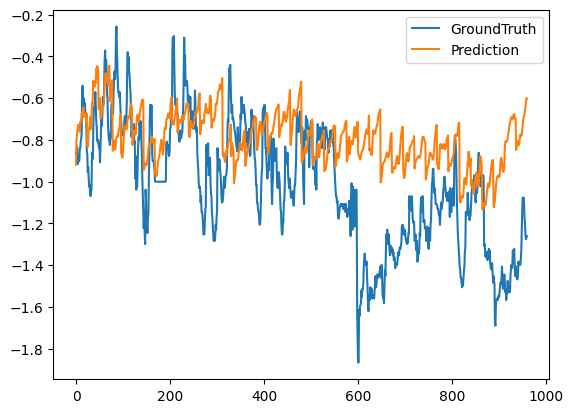

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
setting = '/content/Informer/Informer2020-main/results/informer_ETTh1_ftS_sl96_ll48_pl960_dm512_nh8_el2_dl1_df2048_atfull_fc5_ebtimeF_dtTrue_mxTrue_test_1'

preds = np.load('/content/Informer/Informer2020-main/results/informer_ETTh1_ftS_sl96_ll48_pl960_dm512_nh8_el2_dl1_df2048_atfull_fc5_ebtimeF_dtTrue_mxTrue_test_1/pred.npy')
trues = np.load('/content/Informer/Informer2020-main/results/informer_ETTh1_ftS_sl96_ll48_pl960_dm512_nh8_el2_dl1_df2048_atfull_fc5_ebtimeF_dtTrue_mxTrue_test_1/true.npy')

# [samples, pred_len, dimensions]
preds.shape, trues.shape

prediction = np.load('/content/Informer/Informer2020-main/results/informer_ETTh1_ftS_sl96_ll48_pl960_dm512_nh8_el2_dl1_df2048_atfull_fc5_ebtimeF_dtTrue_mxTrue_test_1/real_prediction.npy')

prediction.shape

plt.figure()
plt.plot(prediction[0,:,-1])
plt.show()

plt.figure()
plt.plot(trues[0,:,-1], label='GroundTruth')
plt.plot(preds[0,:,-1], label='Prediction')
plt.legend()
plt.show()

In [ ]:
!python -u main_informer.py --model informer --data ETTh1 --attn prob --freq h --do_predict --pred_len 960 --attn full

Args in experiment:
Namespace(model='informer', data='ETTh1', root_path='./data/ETT/', data_path='ETTh1.csv', features='M', target='OT', freq='h', checkpoints='./checkpoints/', seq_len=96, label_len=48, pred_len=960, enc_in=7, dec_in=7, c_out=7, d_model=512, n_heads=8, e_layers=2, d_layers=1, s_layers=[3, 2, 1], d_ff=2048, factor=5, padding=0, distil=True, dropout=0.05, attn='full', embed='timeF', activation='gelu', output_attention=False, do_predict=True, mix=True, cols=None, num_workers=0, itr=2, train_epochs=6, batch_size=32, patience=3, learning_rate=0.0001, des='test', loss='mse', lradj='type1', use_amp=False, inverse=False, use_gpu=True, gpu=0, use_multi_gpu=False, devices='0,1,2,3', detail_freq='h')
Use GPU: cuda:0
>>>>>>>start training : informer_ETTh1_ftM_sl96_ll48_pl960_dm512_nh8_el2_dl1_df2048_atfull_fc5_ebtimeF_dtTrue_mxTrue_test_0>>>>>>>>>>>>>>>>>>>>>>>>>>
train 7585
val 1921
test 1921
	iters: 100, epoch: 1 | loss: 0.5604634
	speed: 0.5184s/iter; left time: 685.8705s
	iter

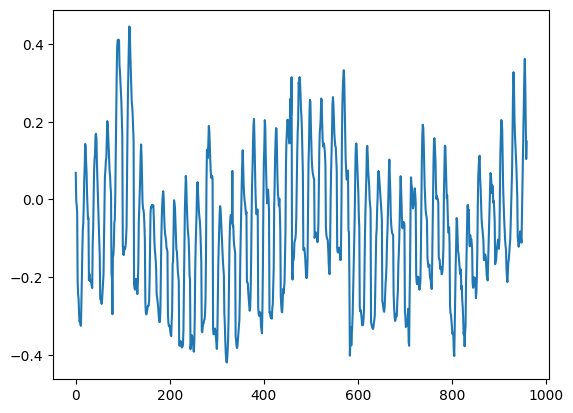

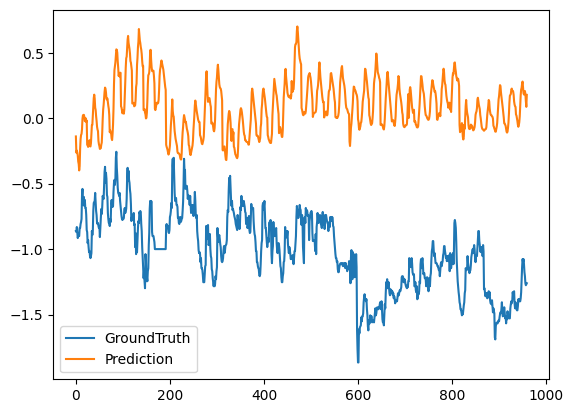

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
setting = '/content/Informer/Informer2020-main/results/informer_ETTh1_ftM_sl96_ll48_pl960_dm512_nh8_el2_dl1_df2048_atfull_fc5_ebtimeF_dtTrue_mxTrue_test_0'

preds = np.load('/content/Informer/Informer2020-main/results/informer_ETTh1_ftM_sl96_ll48_pl960_dm512_nh8_el2_dl1_df2048_atfull_fc5_ebtimeF_dtTrue_mxTrue_test_0/pred.npy')
trues = np.load('/content/Informer/Informer2020-main/results/informer_ETTh1_ftM_sl96_ll48_pl960_dm512_nh8_el2_dl1_df2048_atfull_fc5_ebtimeF_dtTrue_mxTrue_test_0/true.npy')

# [samples, pred_len, dimensions]
preds.shape, trues.shape

prediction = np.load('/content/Informer/Informer2020-main/results/informer_ETTh1_ftM_sl96_ll48_pl960_dm512_nh8_el2_dl1_df2048_atfull_fc5_ebtimeF_dtTrue_mxTrue_test_0/real_prediction.npy')

prediction.shape

plt.figure()
plt.plot(prediction[0,:,-1])
plt.show()

plt.figure()
plt.plot(trues[0,:,-1], label='GroundTruth')
plt.plot(preds[0,:,-1], label='Prediction')
plt.legend()
plt.show()